The regression model predicts crop labels encoded as numeric values.
- Performance metrics suggest moderate accuracy.
- PCA helped visualize feature space and label distribution.
- Features like Nitrogen and Rainfall had higher influence on predictions (coefficients).
- Model can be improved with advanced algorithms like classification models or ensemble methods.

# 1. LIBRARIES INSTALLATION

In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [241]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score

In [243]:
import warnings
warnings.filterwarnings('ignore')

In [245]:
print("Libraries imported successfully.")

Libraries imported successfully.


# 2. READING DATA

In [248]:
df = pd.read_csv('crop_recommendation.csv')  
print("\nDataset Loaded Successfully. Displaying first 5 rows:")
display(df.head())


Dataset Loaded Successfully. Displaying first 5 rows:


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [250]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None


In [252]:
print(df.describe())

                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117  


In [254]:
print(f"Columns: {df.columns.tolist()}")

Columns: ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']


In [256]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [258]:
df.shape

(2200, 8)

In [260]:
df.sample()

,N,P,K,temperature,humidity,ph,rainfall,label
737,57,60,17,26.237731,67.885214,7.504608,73.58664,blackgram


In [262]:
df.sample(5)

,N,P,K,temperature,humidity,ph,rainfall,label
1846,32,20,35,26.521664,98.382277,5.588655,144.626170,coconut
1095,108,94,47,27.359116,84.546250,6.387431,90.812505,banana
128,78,48,22,23.089749,63.104596,5.588651,70.434736,maize
2068,62,59,41,24.224876,74.894654,7.175171,192.493126,jute
1805,7,11,32,29.259029,95.112947,5.542169,184.762450,coconut


# 3. INITIAL PREPROCESSING

- Check for duplicates and remove them
- Convert data types if needed (here, all numeric except label)


In [265]:
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

if duplicates > 0:
    df = df.drop_duplicates()
    print("Duplicates removed.")
else:
    print("No duplicates found.")


Number of duplicate rows: 0
No duplicates found.


In [267]:
df['label'] = df['label'].astype(str)

# 4. HANDLING MISSING VALUES

- Check missing values
- Remove rows with missing values


In [270]:
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)


Missing values in each column:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [272]:
df_clean = df.dropna()

In [274]:
# Since missing values are critical, drop rows with missing values if any
if missing_values.sum() > 0:
    df = df.dropna()
    print("Rows with missing values dropped.")
else:
    print("No missing values found.")

print(f"\nShape after removing missing values: {df.shape}")

No missing values found.

Shape after removing missing values: (2200, 8)


# 5. DATA TYPES & CONVERSION

In [277]:
print("\nData types before conversion:")
print(df.dtypes)



Data types before conversion:
N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object


In [279]:
df['label'] = df['label'].astype(str)

In [281]:
print("\nData types after conversion:")
print(df.dtypes)


Data types after conversion:
N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object


# 6. EXPLORATORY DATA ANALYSIS (EDA)
- Distribution of target labels (crop types)
- Summary statistics of numeric features
- Histograms of numeric features
- Boxplots for outlier detection
- Correlation heatmap for numeric features

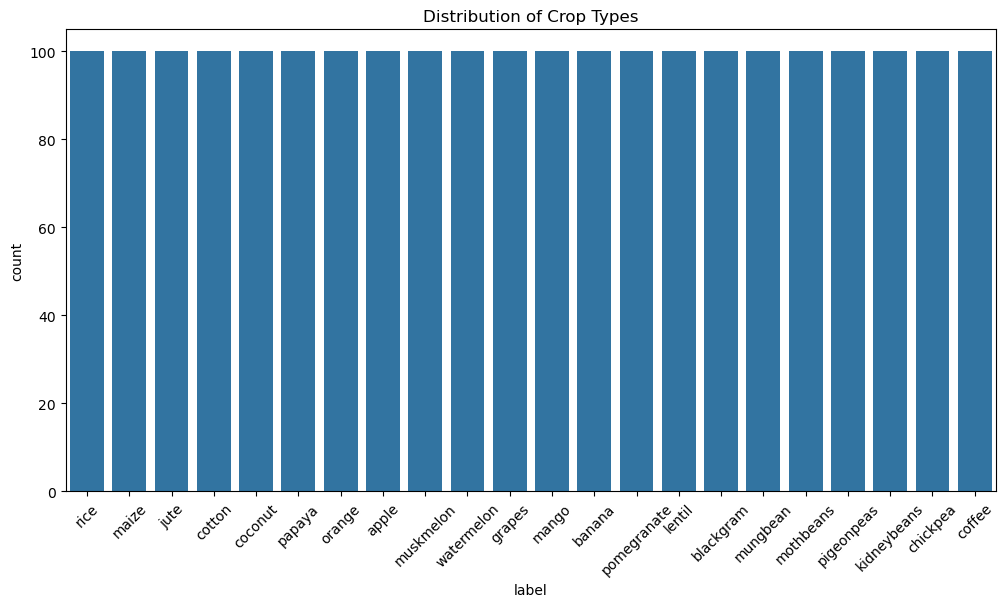

In [284]:
plt.figure(figsize=(12,6))
sns.countplot(x='label', data=df, order=df['label'].value_counts().index)
plt.title('Distribution of Crop Types')
plt.xticks(rotation=45)
plt.show()

In [286]:
print("\nSummary Statistics of Numeric Features:")
display(df.describe())


Summary Statistics of Numeric Features:


,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


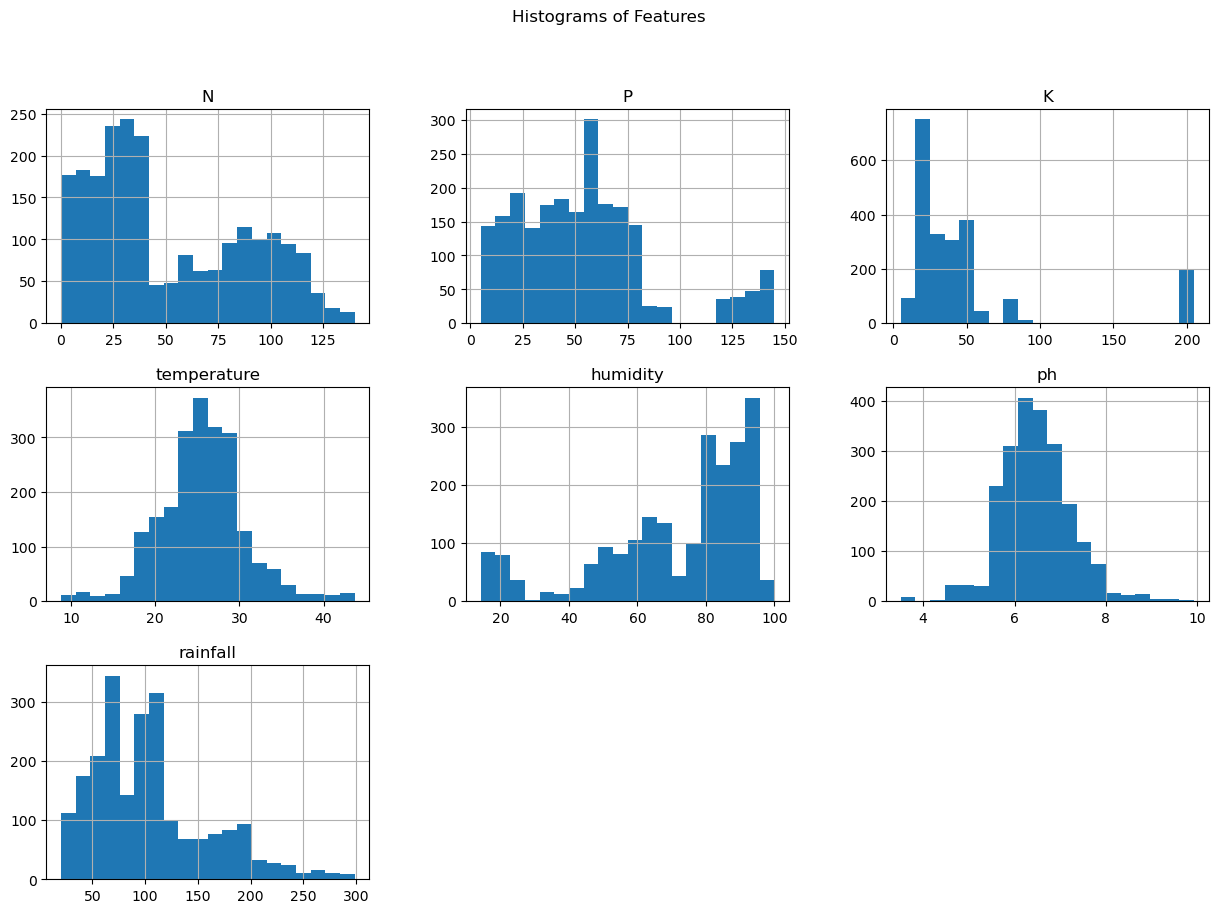

In [288]:
df.hist(column=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'], figsize=(15,10), bins=20)
plt.suptitle('Histograms of Features')
plt.show()


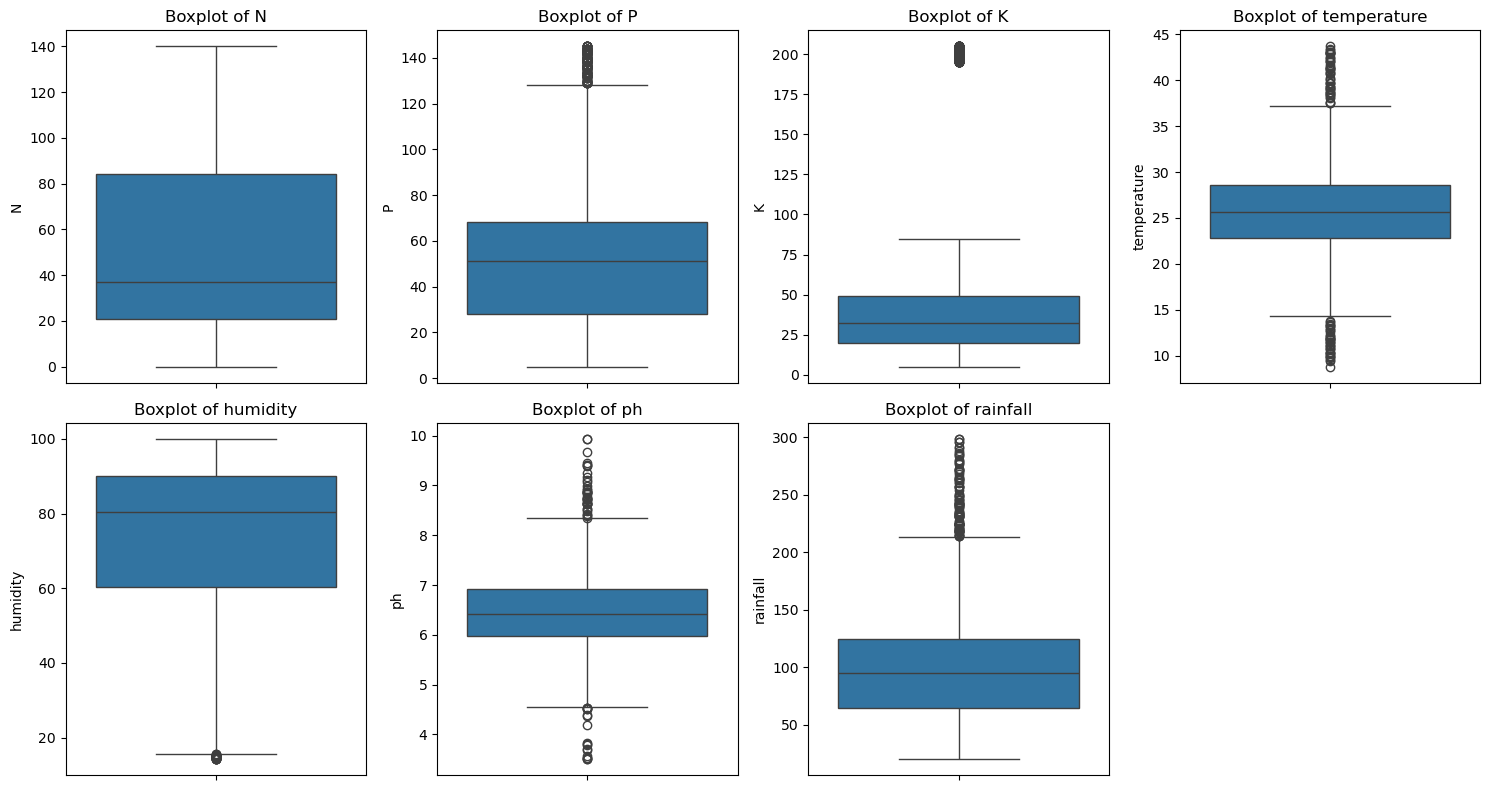

In [289]:
plt.figure(figsize=(15,8))
for i, col in enumerate(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']):
    plt.subplot(2,4,i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

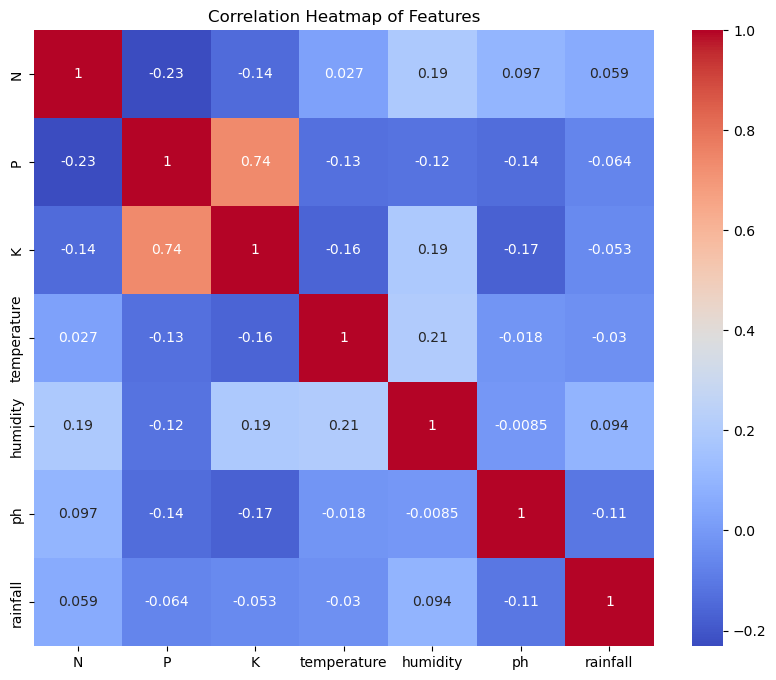

In [290]:
plt.figure(figsize=(10,8))
sns.heatmap(df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()


# 6. OUTLIER REMOVAL using IQR method
- Visualize outliers using boxplots
- Remove outliers using IQR

In [296]:
def remove_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    before = df.shape[0]
    df_filtered = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
    after = df_filtered.shape[0]
    print(f'{feature}: Removed {before - after} outliers')
    return df_filtered

In [298]:
for feature in ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']:
    df = remove_outliers(df, feature)


N: Removed 0 outliers
P: Removed 138 outliers
K: Removed 62 outliers
temperature: Removed 58 outliers
humidity: Removed 0 outliers
ph: Removed 58 outliers
rainfall: Removed 38 outliers


In [300]:
print(f"\nShape after outlier removal: {df.shape}")



Shape after outlier removal: (1846, 8)


# 7. FEATURE SCALING
- Separating features and target
- Normalize features using MinMaxScaler
- Standardize features using StandardScaler


In [303]:
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
X = df[features]

In [305]:
minmax_scaler = MinMaxScaler()
X_norm = minmax_scaler.fit_transform(X)
X_norm_df = pd.DataFrame(X_norm, columns=features)
print("\nFirst 5 rows after MinMax Normalization:")
display(X_norm_df.head())


First 5 rows after MinMax Normalization:


,N,P,K,temperature,humidity,ph,rainfall
0,0.642857,0.411111,0.4750,0.259066,0.790267,0.500431,0.799151
1,0.607143,0.588889,0.4500,0.300649,0.770633,0.641414,0.902891
2,0.528571,0.333333,0.4375,0.521029,0.768751,0.626213,0.973780
3,0.671429,0.533333,0.4375,0.230962,0.800665,0.293780,0.969888
4,0.635714,0.544444,0.4125,0.428817,0.808144,0.548477,0.919470


In [307]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std_df = pd.DataFrame(X_std, columns=features)
print("\nFirst 5 rows after Standardization:")
display(X_std_df.head())


First 5 rows after Standardization:


,N,P,K,temperature,humidity,ph,rainfall
0,0.943866,-0.140507,0.617341,-1.163084,0.540214,0.014157,1.935598
1,0.812004,0.570599,0.496932,-0.948659,0.465882,0.800959,2.388110
2,0.521906,-0.451616,0.436727,0.187749,0.458760,0.716127,2.697324
3,1.049356,0.348379,0.436727,-1.308004,0.579578,-1.139126,2.680348
4,0.917494,0.392823,0.316318,-0.287749,0.607893,0.282292,2.460426


# 8. LABEL ENCODING for target variable (required for regression)

In [313]:
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])

In [315]:
print("\nUnique crops and their encoded labels:")
for crop, code in zip(le.classes_, range(len(le.classes_))):
    print(f"{crop} -> {code}")


Unique crops and their encoded labels:
banana -> 0
blackgram -> 1
chickpea -> 2
coconut -> 3
coffee -> 4
cotton -> 5
jute -> 6
kidneybeans -> 7
lentil -> 8
maize -> 9
mango -> 10
mothbeans -> 11
mungbean -> 12
muskmelon -> 13
orange -> 14
papaya -> 15
pigeonpeas -> 16
pomegranate -> 17
rice -> 18
watermelon -> 19


In [317]:
y = df['label_encoded']

# 9. TRAIN-TEST SPLIT & PCA
- PCA for FOR DIMENSIONALITY REDUCTION AND VISUALIZATION

In [320]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42, stratify=y)
print(f"\nTrain set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")


Train set size: 1476 samples
Test set size: 370 samples


In [322]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

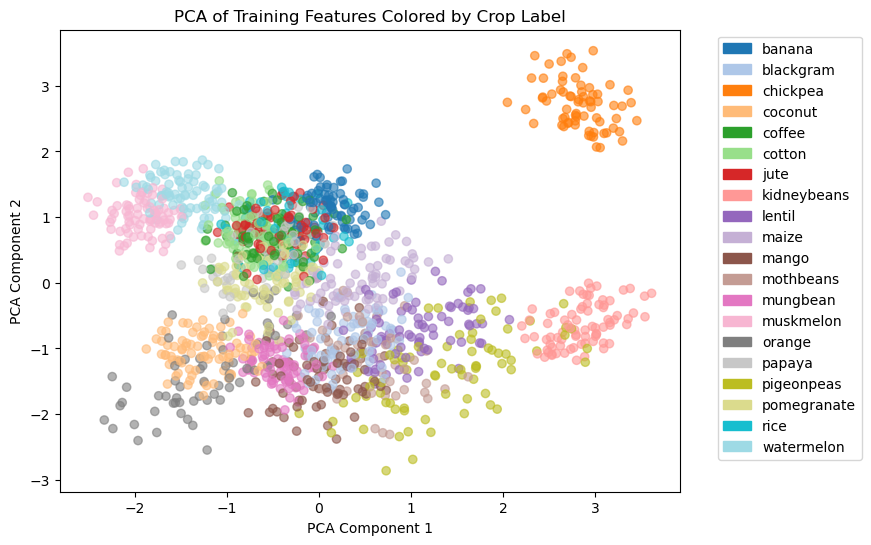

In [324]:
import matplotlib.patches as mpatches
import matplotlib.cm as cm
import numpy as np

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='tab20', alpha=0.6)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Training Features Colored by Crop Label')

# Create manual legend
unique_labels = np.unique(y_train)
cmap = cm.get_cmap('tab20', len(unique_labels))  # discrete colormap with required colors

patches = []
for i, label in enumerate(unique_labels):
    patches.append(mpatches.Patch(color=cmap(i), label=le.inverse_transform([label])[0]))

plt.legend(handles=patches, bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()


In [325]:
print(f"\nExplained variance by 2 PCA components: {pca.explained_variance_ratio_.sum():.2%}")



Explained variance by 2 PCA components: 43.95%


# 10. MODEL TRAINING - LINEAR REGRESSION

- Initialize the Linear Regression model
- Train the model on the training dataset
- Output intercept and feature coefficients


In [329]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [331]:
lr_model = LinearRegression()

lr_model.fit(X_train, y_train)

LinearRegression()

In [333]:
print(f"Intercept (bias term): {lr_model.intercept_}")
coefficients = pd.DataFrame(lr_model.coef_, index=features, columns=['Coefficient'])
print("Coefficients for each feature:")
print(coefficients)

Intercept (bias term): 9.15858756827002
Coefficients for each feature:
             Coefficient
N              -1.274039
P              -1.854094
K               0.177447
temperature    -0.534233
humidity        1.447463
ph             -0.590256
rainfall       -0.584797


# 11. Prediction
- Predict target values on both training and test datasets
- Evaluate model performance on training and test sets using MSE, RMSE, MAE, and R² metrics
- Perform residual analysis: plot residuals vs predicted values and histogram of residuals
- Plot actual vs predicted values scatter plot with ideal prediction line
- Display model explained variance (R²) on the test set
- Visualize sorted regression coefficients for feature importance interpretation


In [339]:
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

In [341]:
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print("\nTraining Set Performance:")
print(f"Mean Squared Error (MSE): {mse_train:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.4f}")
print(f"Mean Absolute Error (MAE): {mae_train:.4f}")
print(f"R-squared (R2): {r2_train:.4f}")



Training Set Performance:
Mean Squared Error (MSE): 24.8910
Root Mean Squared Error (RMSE): 4.9891
Mean Absolute Error (MAE): 3.7450
R-squared (R2): 0.2475


In [343]:
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("\nTest Set Performance:")
print(f"Mean Squared Error (MSE): {mse_test:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.4f}")
print(f"Mean Absolute Error (MAE): {mae_test:.4f}")
print(f"R-squared (R2): {r2_test:.4f}")


Test Set Performance:
Mean Squared Error (MSE): 24.8483
Root Mean Squared Error (RMSE): 4.9848
Mean Absolute Error (MAE): 3.7649
R-squared (R2): 0.2519


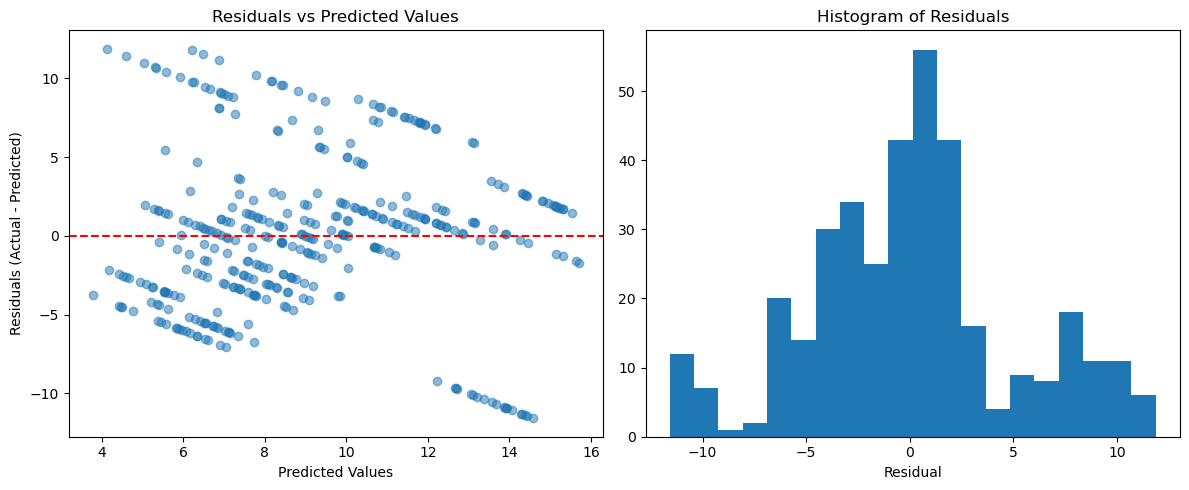

In [345]:
residuals = y_test - y_test_pred

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(y_test_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals vs Predicted Values')

plt.subplot(1,2,2)
plt.hist(residuals, bins=20)
plt.xlabel('Residual')
plt.title('Histogram of Residuals')

plt.tight_layout()
plt.show()





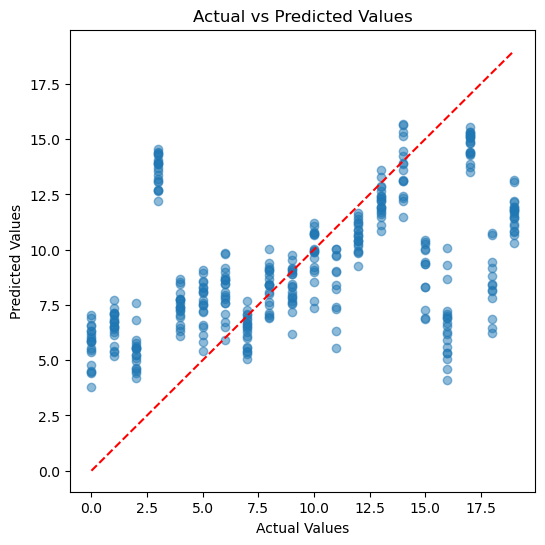

In [346]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


Explained Variance (R2) on Test Set: 0.2519


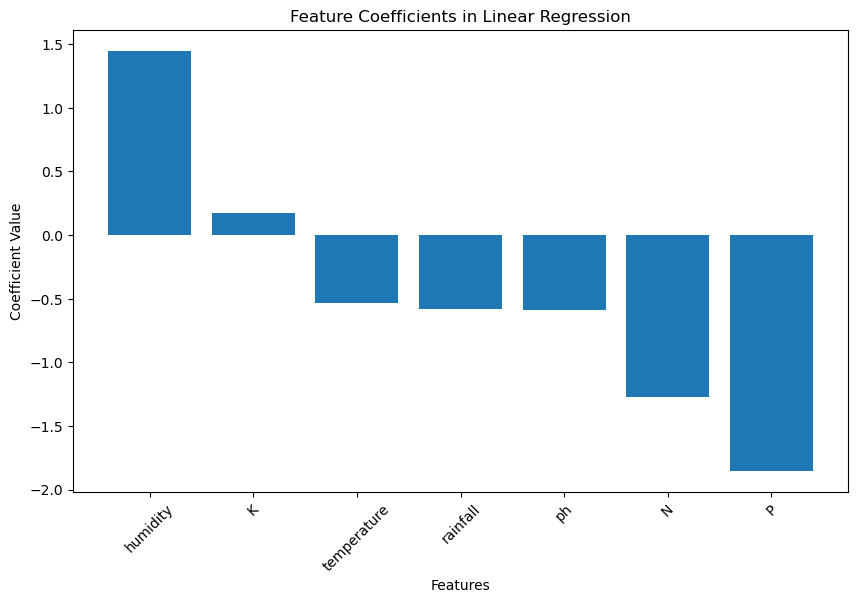

In [349]:
explained_variance = r2_test
print(f"\nExplained Variance (R2) on Test Set: {explained_variance:.4f}")

coefficients_sorted = coefficients.sort_values(by='Coefficient', ascending=False)
plt.figure(figsize=(10,6))
plt.bar(coefficients_sorted.index, coefficients_sorted['Coefficient'])
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Feature Coefficients in Linear Regression')
plt.show()